### Quantum Cryptography -Day6
# BB84 Protocol with Intercept-Resend Attack
Quantum Key Distribution(QKD) allows two parties(Alice and Bob) to generate a secrete key securly using principlaes of quantum mechanic.In this notebook we will study the **BB84 protocol** and analyze the effect of an **Intercept-Resend-Attack** perform by an a evesdropper(eve).In this we will elarn:
- How BB84 Key Distribution works
- How Eve perform an intercept-resend attack.
- How Quantum Bit Error Rate(QBER) is calculated.
- Difference between **no eve** and **eve present** scenerios
- Why error rate increase when evesdropping occures.

## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1 : Define BB84 Paramaeters
- Alice send random bits
- Alice and Bob randomly choose bases(Z or X)
- Z Basis : $|0\rangle$, $|1\rangle$
- X Basis : $|+\rangle$, $|-\rangle$

In [2]:
num_bits=1000
alice_bits=np.random.randint(2,size=num_bits)
alice_bases=np.random.randint(2,size=num_bits)
bob_bases=np.random.randint(2,size=num_bits)

## Step 2: BB84 without Eve(Ideal Cases)
Bob measures Alice's qubits directly:
- If Bob chooses the same basis as Alice  -> Correct result
- If Basis Differs -> Random Outcome

In [9]:
bob_result_no_eve=[]
for i in range(num_bits):
    if alice_bases[i]==bob_bases[i]:
        bob_result_no_eve.append(alice_bits[i])
    else:
        bob_result_no_eve.append(np.random.randint(2))
bob_result_no_eve=np.array(bob_result_no_eve)

## Step 3 : Key Sifting(No Eve)
Alice and Bob keep only bits where their bases match.This forms the **sifted key**

In [10]:
matching_indices=alice_bases==bob_bases
alice_Key_no_eve=alice_bits[matching_indices]
bob_key_no_eve = bob_result_no_eve[matching_indices]


## Step 5 : Comapare QBER (No eve)
QBER = Number of Mismatched bits / Total sifted bits

In an ideal scenario,QBER should be close to **0%**. 

In [11]:
qber_no_eve=np.sum(alice_Key_no_eve!=bob_key_no_eve)/len(alice_Key_no_eve)
qber_no_eve

np.float64(0.0)

## Step 6 : Eve Performs Intercept-Resend Attack
What eve does:
- 1.Randomly chhose a measurement basis
- 2.Measure Alice's qubit
- 3.Resends the measured qubit to Bob

This disturbs the quantum state and introduces error.

In [12]:
eve_bases=np.random.randint(2,size=num_bits)
eve_results=[]
for i in range(num_bits):
    if alice_bases[i]==eve_bases[i]:
        eve_results.append(alice_bits[i])
    else:
        eve_results.append(np.random.randint(2))
eve_results=np.array(eve_results)

## Step 6: Bob measure Eve's Forwarded Qubit
Bob now measure the qubit sent by Eve instead of Alice.Error propogate when eve chooses the wrong basis.

In [14]:
bob_results_eve=[]
for i in range(num_bits):
    if eve_bases[i]==bob_bases[i]:
        bob_results_eve.append(eve_results[i])
    else:
        bob_results_eve.append(np.random.randint(2))
bob_results_eve=np.array(bob_results_eve)


## Step 7 : Key Sifting(With Eve)
again ,Alice and Bob keep only matching basis bits

In [15]:
alice_key_eve=alice_bits[matching_indices]
bob_key_eve=bob_results_eve[matching_indices]

## Step 8 : Compute QBER (With Eve)
Intercept-resend attack typically introduces near 25% error rate.This alerts Alice and Bob that the channel is compromised.

In [16]:
qber_eve=np.sum(alice_key_eve!=bob_key_eve)/len(alice_key_eve)
qber_eve

np.float64(0.24493927125506074)

## Step 9: Plot Error Rate Comparision
This plot clearly shows how eve increases the error rate.

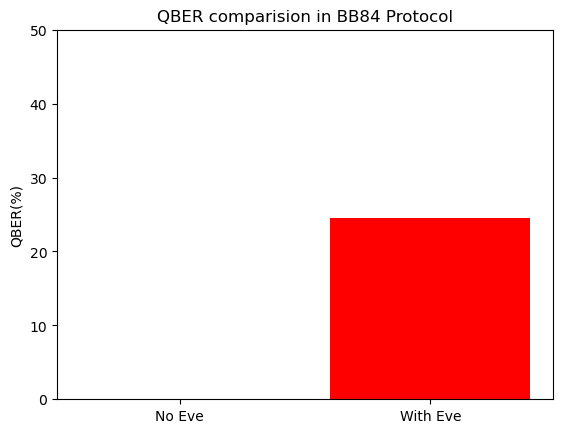

In [17]:
labels=['No Eve','With Eve']
qbers=[qber_no_eve*100,qber_eve*100]
plt.bar(labels,qbers,color=['green','red'])
plt.ylabel('QBER(%)')
plt.title('QBER comparision in BB84 Protocol')
plt.ylim(0,50)
plt.show()

- Eves Randomly chooses His measurement basis(Z or X)
- There are 2 cases when Alice and Bob choose the same basis:
    - Eve chooses the **same basis** as alice -> no error introduced.
    - Eve chooses the **wrong basis** -> bob receives a random bit,which matches Alice bits **50% of the time**.
- Probability breakdown:

| Event | Probability |
| ---------------------------| ------------ |
| Bob Measure same basis as alice | 0.5 |
| Eve chooses wrong basis | 0.5 |
| Bob get wrong bit due to eve  | 0.5 |

- Total QBER near to 0.5 * 0.5* 1 = **25%**

## Conclusion
- BB84 is secure due to quantum measurement disturbance
- Eve's intercept-rsend attack introduces detectable errors
- High QBER signals presence of evesdropping
- This forms the foundation of Quantum cryptographic security

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day06_BB84_with_intercept_resend_attack.ipynb

**Date created**: 29-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>